# Successive halving
---------------------------------

This example shows how to compare multiple tree-based models using successive halving.

Import the boston dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#boston-dataset).
 This is a small and easy to train dataset whose goal is to predict house prices.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_boston
from atom import ATOMRegressor

In [2]:
# Load the dataset's features and targets
X, y = load_boston(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMRegressor(X, y, verbose=1, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ================== >>
Shape: (506, 14)
Scaled: False
-----------------------------------
Train set size: 405
Test set size: 101



In [4]:
# We can compare tree-based models via successive halving
atom.successive_halving(
    models=['tree', 'bag', 'et', 'rf', 'lgb', 'catb'],
    metric='mae',
    bagging=5
)


Training ===================================== >>
Metric: neg_mean_absolute_error


Run: 0 ================================ >>
Models: Tree, Bag, ET, RF, LGB, CatB
Size of training set: 67 (17%)
Size of test set: 101


Results for Decision Tree:         
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -0.0000
Test evaluation --> neg_mean_absolute_error: -3.3257
Time elapsed: 0.007s
Bagging -----------------------------------------
Evaluation --> neg_mean_absolute_error: -4.3307 ± 0.5250
Time elapsed: 0.022s
-------------------------------------------------
Total time: 0.029s


Results for Bagging Regressor:         
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -1.3054
Test evaluation --> neg_mean_absolute_error: -2.6950
Time elapsed: 0.020s
Bagging -----------------------------------------
Evaluation --> neg_mean_absolute_error: -3.0957 ± 0.2677
Time elapsed: 0.082s
---------------------

## Analyze results

In [5]:
# Note that the results dataframe now is multi-index
atom.results

metric_train metric_test time_fit mean_bagging std_bagging  \
n_models model                                                              
1        CatB     -0.397799    -1.87721   3.348s     -2.05012   0.0891846   
3        ET    -2.31519e-14    -2.23608   0.099s     -2.60165    0.289034   
         RF       -0.981978    -2.50547   0.131s     -2.61442    0.118758   
         CatB      -0.28355    -2.41962   1.847s     -2.56808    0.211868   
6        Tree            -0    -3.32574   0.007s     -4.33069    0.525026   
         Bag       -1.30537    -2.69505   0.020s     -3.09566    0.267668   
         ET    -2.25624e-14    -2.15409   0.086s     -2.55543    0.170823   
         RF        -1.15087     -2.4143   0.109s      -2.9574    0.225311   
         LGB       -3.42052    -4.55996   0.027s     -4.83931    0.268167   
         CatB     -0.080555    -2.39843   1.333s     -2.91647    0.256428   

               time_bagging     time  
n_models model                        
1        CatB       14.871s  18.221s  
3        ET          0.418s   0.517s  
         RF          0.662s   0.793s  
         CatB        6.494s   8.343s  
6        Tree        0.022s   0.029s  
         Bag         0.082s   0.104s  
         ET          0.360s   0.446s  
         RF          0.506s   0.615s  
         LGB         0.074s   0.103s  
         CatB        4.065s   5.399s

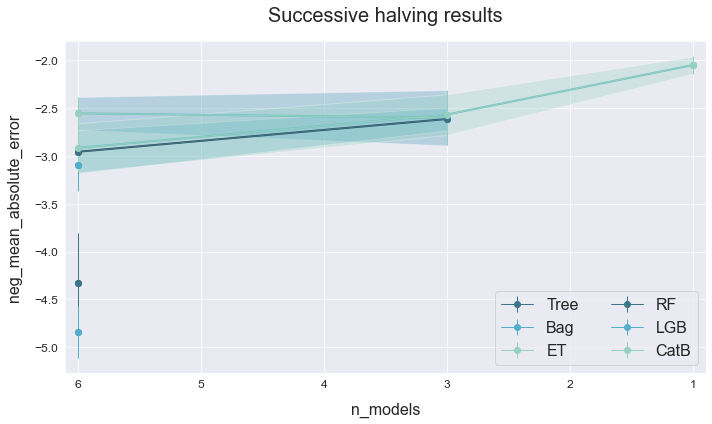

In [6]:
# Plot the successive halving's results
atom.plot_successive_halving()